### Data Preprocessing

This step deals with cleansing the consolidated text to remove noise to ensure efficient syntactic, semantic text analysis for deriving meaningful insights from text. Some common cleaning steps are briefed below.

#### Sentence Tokenize

Tokenizing is the process of breaking a large set of texts into smaller meaningful chunks such as sentences, words, phrases. NLTK library provides sent_tokenize for sentence level tokenizing, which uses a pre-trained model PunktSentenceTokenize, to determine punctuation and characters marking the end of sentence for European languages.  

In [1]:
%matplotlib inline

import nltk

from nltk.tokenize import sent_tokenize

text='Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics. I like reading books and travelling.'

# sent_tokenize uses an instance of PunktSentenceTokenizer from the nltk. tokenize.punkt module. This instance has already been trained on and works well for many European languages. So it knows what punctuation and characters mark the end of a sentence and the beginning of a new sentence.
sent_tokenize_list = sent_tokenize(text)
print(sent_tokenize_list)

['Statistics skills, and programming skills are equally important for analytics.', 'Statistics skills, and domain knowledge are important for analytics.', 'I like reading books and travelling.']


In [2]:
# There are total 17 european languages that NLTK support for sentence tokenize
# Let's try loading a spanish model
import nltk.data
spanish_tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
spanish_tokenizer.tokenize('Hola. Esta es una frase espanola.')

['Hola.', 'Esta es una frase espanola.']

#### Word Tokenize

word_tokenize is a wrapper function that calls tokenize by the TreebankWordTokenizer

In [3]:
from nltk.tokenize import word_tokenize
print word_tokenize(text)

# Another equivalent call method
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

print tokenizer.tokenize(text)

['Statistics', 'skills', ',', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics', '.', 'Statistics', 'skills', ',', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics', '.', 'I', 'like', 'reading', 'books', 'and', 'travelling', '.']
['Statistics', 'skills', ',', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics.', 'Statistics', 'skills', ',', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics.', 'I', 'like', 'reading', 'books', 'and', 'travelling', '.']


In [4]:
# Except the TreebankWordTokenizer, there are other alternative word tokenizers, such as PunktWordTokenizer and WordPunktTokenizer
# PunktTokenizer splits on punctuation, but keeps it with the word
# from nltk.tokenize import PunktWordTokenizer
# punkt_word_tokenizer = PunktWordTokenizer()
# print punkt_word_tokenizer.tokenize(text) 

# WordPunctTokenizer splits all punctuations into separate tokens
from nltk.tokenize import WordPunctTokenizer
word_punct_tokenizer = WordPunctTokenizer()
print word_punct_tokenizer.tokenize(text)

['Statistics', 'skills', ',', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics', '.', 'Statistics', 'skills', ',', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics', '.', 'I', 'like', 'reading', 'books', 'and', 'travelling', '.']


#### PoS tagging

The default pos tagger model using in NLTK is maxent_treebanck_pos_tagger model

In [5]:
from nltk import chunk

tagged_sent = nltk.pos_tag(nltk.word_tokenize('This is a sample English sentence'))
print tagged_sent

tree = chunk.ne_chunk(tagged_sent)
tree.draw()

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('English', 'JJ'), ('sentence', 'NN')]


In [6]:
# To get help about tags
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [7]:
from nltk.tag.perceptron import PerceptronTagger

PT = PerceptronTagger()
print PT.tag('This is a sample English sentence'.split())

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('English', 'JJ'), ('sentence', 'NN')]


### Remove stopwords

In [8]:
from nltk.corpus import stopwords

# Function to remove stop words
def remove_stopwords(text, lang='english'):
    words = nltk.word_tokenize(text)
    lang_stopwords = stopwords.words(lang)
    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]
    return " ".join(stopwords_removed)

print remove_stopwords('This is a sample English sentence')

sample English sentence


### Remove punctuations

In [9]:
import string 

# Function to remove punctuations
def remove_punctuations(text):
    words = nltk.word_tokenize(text)
    punt_removed = [w for w in words if w.lower() not in string.punctuation]
    return " ".join(punt_removed)

print remove_punctuations('This is a sample English sentence, with punctuations!')

This is a sample English sentence with punctuations


### Remove whitespace & numbers

In [11]:
import re

# Function to remove whitespace
def remove_whitespace(text):
    return " ".join(text.split())

# Function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

text = 'This 	is a     sample  English   sentence, \n with whitespace and numbers 1234!'
print 'Original Text: ', text
print 'Removed whitespace: ', remove_whitespace(text)
print 'Removed numbers: ', remove_numbers(text)

 Original Text:  This 	is a     sample  English   sentence, 
 with whitespace and numbers 1234!
Removed whitespace:  This is a sample English sentence, with whitespace and numbers 1234!
Removed numbers:  This 	is a     sample  English   sentence, 
 with whitespace and numbers !


### Stemming

It is the process of transforming to the root word i.e., it uses an algorithm that removes common word endings for English words, such as “ly”, “es”, “ed” and “s”. For example, assuming for an analysis you may want to consider “carefully”, “cared”, “cares”, “caringly” as “care” instead of separate words.

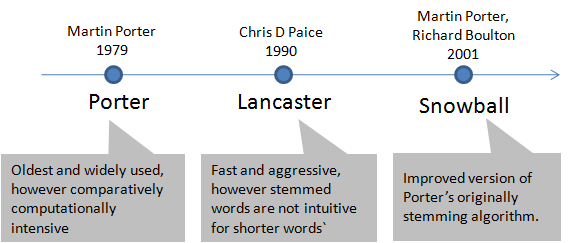

In [12]:
from IPython.display import Image
Image(filename='../Chapter 5 Figures/Stemmers.png', width=500)

In [13]:
from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer

# Function to apply stemming to a list of words
def words_stemmer(words, type="PorterStemmer", lang="english", encoding="utf8"):
    supported_stemmers = ["PorterStemmer","LancasterStemmer","SnowballStemmer"]
    if type is False or type not in supported_stemmers:
        return words
    else:
        stem_words = []
        if type == "PorterStemmer":
            stemmer = PorterStemmer()
            for word in words:
                stem_words.append(stemmer.stem(word).encode(encoding))
        if type == "LancasterStemmer":
            stemmer = LancasterStemmer()
            for word in words:
                stem_words.append(stemmer.stem(word).encode(encoding))
        if type == "SnowballStemmer":
            stemmer = SnowballStemmer(lang)
            for word in words:
                stem_words.append(stemmer.stem(word).encode(encoding))
        return " ".join(stem_words)
    
words =  'caring cares cared caringly carefully'  

print "Original: ", words
print "Porter: ", words_stemmer(nltk.word_tokenize(words), "PorterStemmer")
print "Lancaster: ", words_stemmer(nltk.word_tokenize(words), "LancasterStemmer")
print "Snowball: ", words_stemmer(nltk.word_tokenize(words), "SnowballStemmer")

Original:  caring cares cared caringly carefully
Porter:  care care care caringli care
Lancaster:  car car car car car
Snowball:  care care care care care


### Lemmatizer

It is the process of transforming to the dictionary base form.

In [14]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to a list of words
def words_lemmatizer(text, encoding="utf8"):
    words = nltk.word_tokenize(text)
    lemma_words = []
    wl = WordNetLemmatizer()
    for word in words:
        pos = find_pos(word)
        lemma_words.append(wl.lemmatize(word, pos).encode(encoding))
    return " ".join(lemma_words)

# Function to find part of speech tag for a word
def find_pos(word):
    # Part of Speech constants
    # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
    # You can learn more about these at http://wordnet.princeton.edu/wordnet/man/wndb.5WN.html#sect3
    # You can learn more about all the penn tree tags at https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    pos = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
    # Adjective tags - 'JJ', 'JJR', 'JJS'    
    if pos.lower()[0] == 'j':
        return 'a'
    # Adverb tags - 'RB', 'RBR', 'RBS'
    elif pos.lower()[0] == 'r':
        return 'r'
    # Verb tags - 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'
    elif pos.lower()[0] == 'v': 
        return 'v'
    # Noun tags - 'NN', 'NNS', 'NNP', 'NNPS'
    else:
        return 'n'

print "Lemmatized: ", words_lemmatizer(words)

Lemmatized:  care care care caringly carefully


Note that in the above case, 'caringly' / 'carefully' are inflected form of care and they are an entry word listed in WordNet Dictoinary so they are retained in their actual form itself.

In [15]:
from nltk.corpus import wordnet

syns = wordnet.synsets("good")
print "Definition: ", syns[0].definition()
print "Example: ", syns[0].examples()

synonyms = []
antonyms = []

# Print  synonums and antonyms (having opposite meaning words)
for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print "synonyms: \n", set(synonyms)
print "antonyms: \n", set(antonyms)

Definition:  benefit
Example:  [u'for your own good', u"what's the good of worrying?"]
synonyms: 
set([u'beneficial', u'right', u'secure', u'just', u'unspoilt', u'respectable', u'good', u'goodness', u'dear', u'salutary', u'ripe', u'expert', u'skillful', u'in_force', u'proficient', u'unspoiled', u'dependable', u'soundly', u'honorable', u'full', u'undecomposed', u'safe', u'adept', u'upright', u'trade_good', u'sound', u'in_effect', u'practiced', u'effective', u'commodity', u'estimable', u'well', u'honest', u'near', u'skilful', u'thoroughly', u'serious'])
antonyms: 
set([u'bad', u'badness', u'ill', u'evil', u'evilness'])


### N-grams

In [16]:
from nltk.util import ngrams
from collections import Counter

# Function to extract n-grams from text
def get_ngrams(text, n):
    n_grams = ngrams(nltk.word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]  

text = 'This is a sample English sentence'

print "1-gram: ", get_ngrams(text, 1)
print "2-gram: ", get_ngrams(text, 2)
print "3-gram: ", get_ngrams(text, 3)
print "4-gram: ", get_ngrams(text, 4)

1-gram:  ['This', 'is', 'a', 'sample', 'English', 'sentence']
2-gram:  ['This is', 'is a', 'a sample', 'sample English', 'English sentence']
3-gram:  ['This is a', 'is a sample', 'a sample English', 'sample English sentence']
4-gram:  ['This is a sample', 'is a sample English', 'a sample English sentence']


Let's extract bigram and count their respective frequency 

In [17]:
text = 'Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics'

# remove punctuations
text = remove_punctuations(text)

# Extracting bigrams
result = get_ngrams(text,2)

# Counting bigrams
result_count = Counter(result)

print "Words: ", result_count.keys() # Bigrams
print "\nFrequency: ", result_count.values() # Bigram frequency

# Converting to the result to a data frame
import pandas as pd
df = pd.DataFrame.from_dict(result_count, orient='index')
df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index and column name
print df

Words:  ['are equally', 'domain knowledge', 'skills are', 'knowledge are', 'programming skills', 'are important', 'skills and', 'for analytics', 'and domain', 'important for', 'and programming', 'Statistics skills', 'equally important', 'analytics Statistics']

Frequency:  [1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1]
                      frequency
are equally                   1
domain knowledge              1
skills are                    1
knowledge are                 1
programming skills            1
are important                 1
skills and                    2
for analytics                 2
and domain                    1
important for                 2
and programming               1
Statistics skills             2
equally important             1
analytics Statistics          1


In [18]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

# Create a dictionary with key as file names and values as text for all files in a given folder
def CorpusFromDir(dir_path):
    result = dict(docs = [open(os.path.join(dir_path,f)).read() for f in os.listdir(dir_path)],
               ColNames = map(lambda x: x, os.listdir(dir_path)))
    return result

docs = CorpusFromDir('Data/text_files/')

# Initialize
vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))

#create dataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

# Change column headers to be file names
df.columns = docs.get('ColNames')
print df

             Doc_1.txt  Doc_2.txt  Doc_3.txt
analytics            1          1          0
and                  1          1          1
are                  1          1          0
books                0          0          1
domain               0          1          0
equally              1          0          0
for                  1          1          0
important            1          1          0
knowledge            0          1          0
like                 0          0          1
programming          1          0          0
reading              0          0          1
skills               2          1          0
statistics           1          1          0
travelling           0          0          1


### TF-IDF

In the area of information retrieval TF-IDF is a good statistical measure to reflect the relevance of term to the document in a collection of documents or corpus. Let’s break TF_IDF and apply example to understand it better.

TF (term) =  (Number of times term appears in a document)/(Total number of terms in the document)
IDF (term) = log⁡(  (Total number of documents)/(Number of documents with a given term in it))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))
#create dataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

# Change column headers to be file names
df.columns = docs.get('ColNames')
print df

             Doc_1.txt  Doc_2.txt  Doc_3.txt
analytics     0.276703   0.315269   0.000000
and           0.214884   0.244835   0.283217
are           0.276703   0.315269   0.000000
books         0.000000   0.000000   0.479528
domain        0.000000   0.414541   0.000000
equally       0.363831   0.000000   0.000000
for           0.276703   0.315269   0.000000
important     0.276703   0.315269   0.000000
knowledge     0.000000   0.414541   0.000000
like          0.000000   0.000000   0.479528
programming   0.363831   0.000000   0.000000
reading       0.000000   0.000000   0.479528
skills        0.553405   0.315269   0.000000
statistics    0.276703   0.315269   0.000000
travelling    0.000000   0.000000   0.479528
